In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
df_bank = pd.read_csv("/Users/lolonastri/Desktop/IA_UCEMA/parciales/primer_parcial/data/bank-full.csv", delimiter = ";")
df_bank

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

---

## **Parte 1: Comprensi√≥n y Preparaci√≥n de Datos**

### ‚Üí Validaci√≥n de la data

In [254]:
print("El dataset tiene" , df_bank.shape[0], "filas y", df_bank.shape[1], "columnas")

El dataset tiene 45211 filas y 17 columnas


In [255]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [256]:
from funciones.funciones import validate_columns
validate_columns(df_bank)

Unique_Values Num_Unique_Values  Num_Null_Values  %_Null_Values  \
age                 NaN           45211.0                0            0.0   
job                  12             45211                0            0.0   
marital               3             45211                0            0.0   
education             4             45211                0            0.0   
default               2             45211                0            0.0   
balance             NaN           45211.0                0            0.0   
housing               2             45211                0            0.0   
loan                  2             45211                0            0.0   
contact               3             45211                0            0.0   
day                 NaN           45211.0                0            0.0   
month                12             45211                0            0.0   
duration            NaN           45211.0                0            0.0   
campaign            NaN           45211.0                0            0.0   
pdays               NaN           45211.0                0            0.0   
previous            NaN           45211.0                0            0.0   
poutcome              4             45211                0            0.0   
y                     2             45211                0            0.0   

                                        Sample_Unique_Values  
age                                     [33, 59, 31, 38, 33]  
job        [entrepreneur, unemployed, admin., technician,...  
marital           [married, single, single, single, married]  
education  [tertiary, unknown, secondary, tertiary, terti...  
default                                 [no, no, no, no, no]  
balance                             [0, 541, -1, 1369, 1388]  
housing                              [no, no, yes, yes, yes]  
loan                                    [no, no, no, no, no]  
contact    [cellular, cellular, cellular, cellular, cellu...  
day                                      [20, 29, 15, 3, 10]  
month                              [nov, jan, may, feb, nov]  
duration                            [232, 645, 99, 841, 280]  
campaign                                     [1, 1, 1, 3, 1]  
pdays                                  [-1, -1, 352, -1, 89]  
previous                                     [0, 0, 1, 0, 2]  
poutcome       [unknown, unknown, failure, unknown, failure]  
y                                       [no, no, no, no, no]

In [257]:
df_bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

---

### ‚Üí  Veo los tipos de datos con dtypes

In [258]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [259]:
df_bank['y'].value_counts().sort_index() #desbalanceo de clases

y
no     39922
yes     5289
Name: count, dtype: int64

In [260]:
for col in df_bank.columns:
    print(f"Value counts for {col}:")
    print(df_bank[col].value_counts())
    print("\n")

Value counts for age:
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64


Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64


Value counts for balance:
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617     

---

### ‚Üí La variable `duration` est√° en segundos, la convierto a minutos.

In [261]:
df_bank["duration"] = df_bank["duration"]/60

---

### ‚Üí Valores outliers

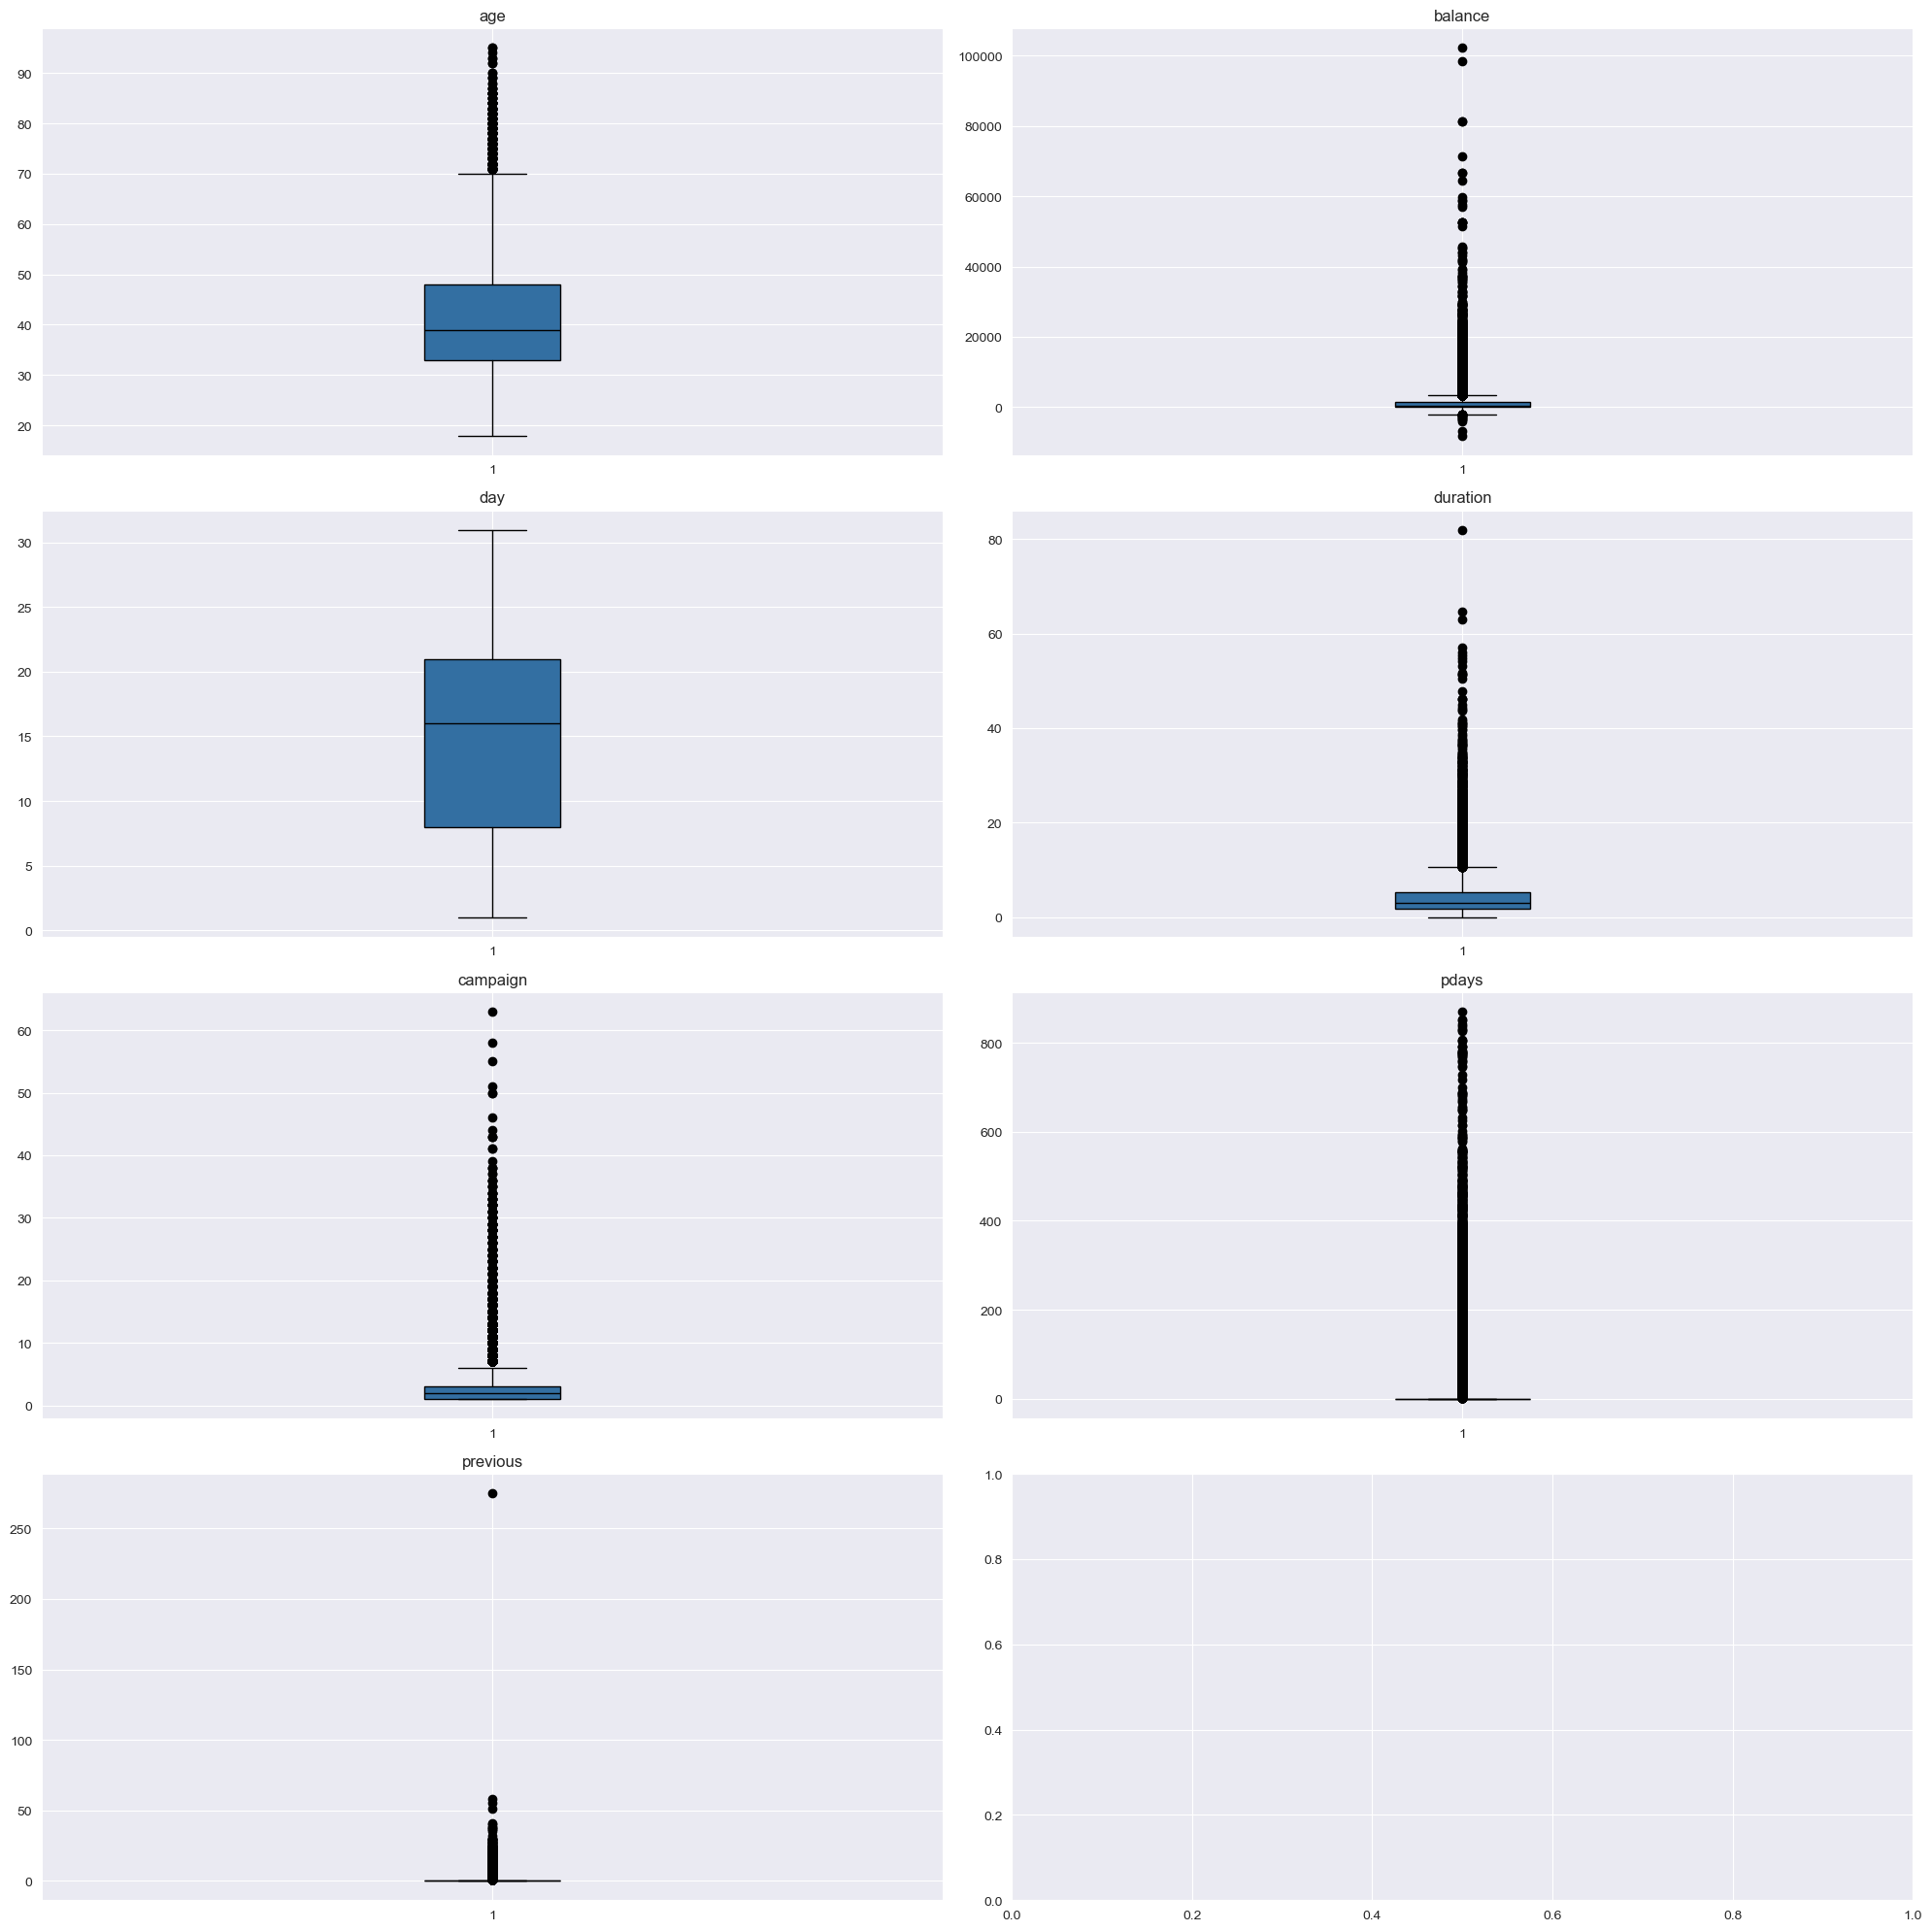

In [262]:
from funciones.funciones import plot_outliers
plot_outliers(df_bank)

#### Para la variable campaign, he tomado la decisi√≥n de recortar los valores extremos a un m√°ximo razonable (por ejemplo, 10 o 15), ya que realizar m√°s de 30 contactos con un mismo cliente es poco com√∫n y podr√≠a sesgar el an√°lisis. Si bien estos valores pueden ser reales, su ocurrencia es tan baja que pueden actuar como ruido en el modelo.

In [263]:
from funciones.funciones import reconocimiento_de_outliers
outliers_campagin, outlier_values_campaign = reconocimiento_de_outliers(df_bank, "campaign", 5)

Outliers de campaign:
2706     19
2967     14
3044     14
3079     24
3118     16
         ..
37792    15
38580    15
38767    14
40336    15
44594    16
Name: campaign, Length: 707, dtype: int64


In [264]:
def remove_outliers(df, column, outliers):
    if column in df.columns:
        df = df.drop(df[df[column].isin(outliers)].index)
    return df

In [265]:
df_bank = remove_outliers(df_bank, "campaign", outlier_values_campaign)

---

## **Parte 2: An√°lisis Exploratorio de Datos**


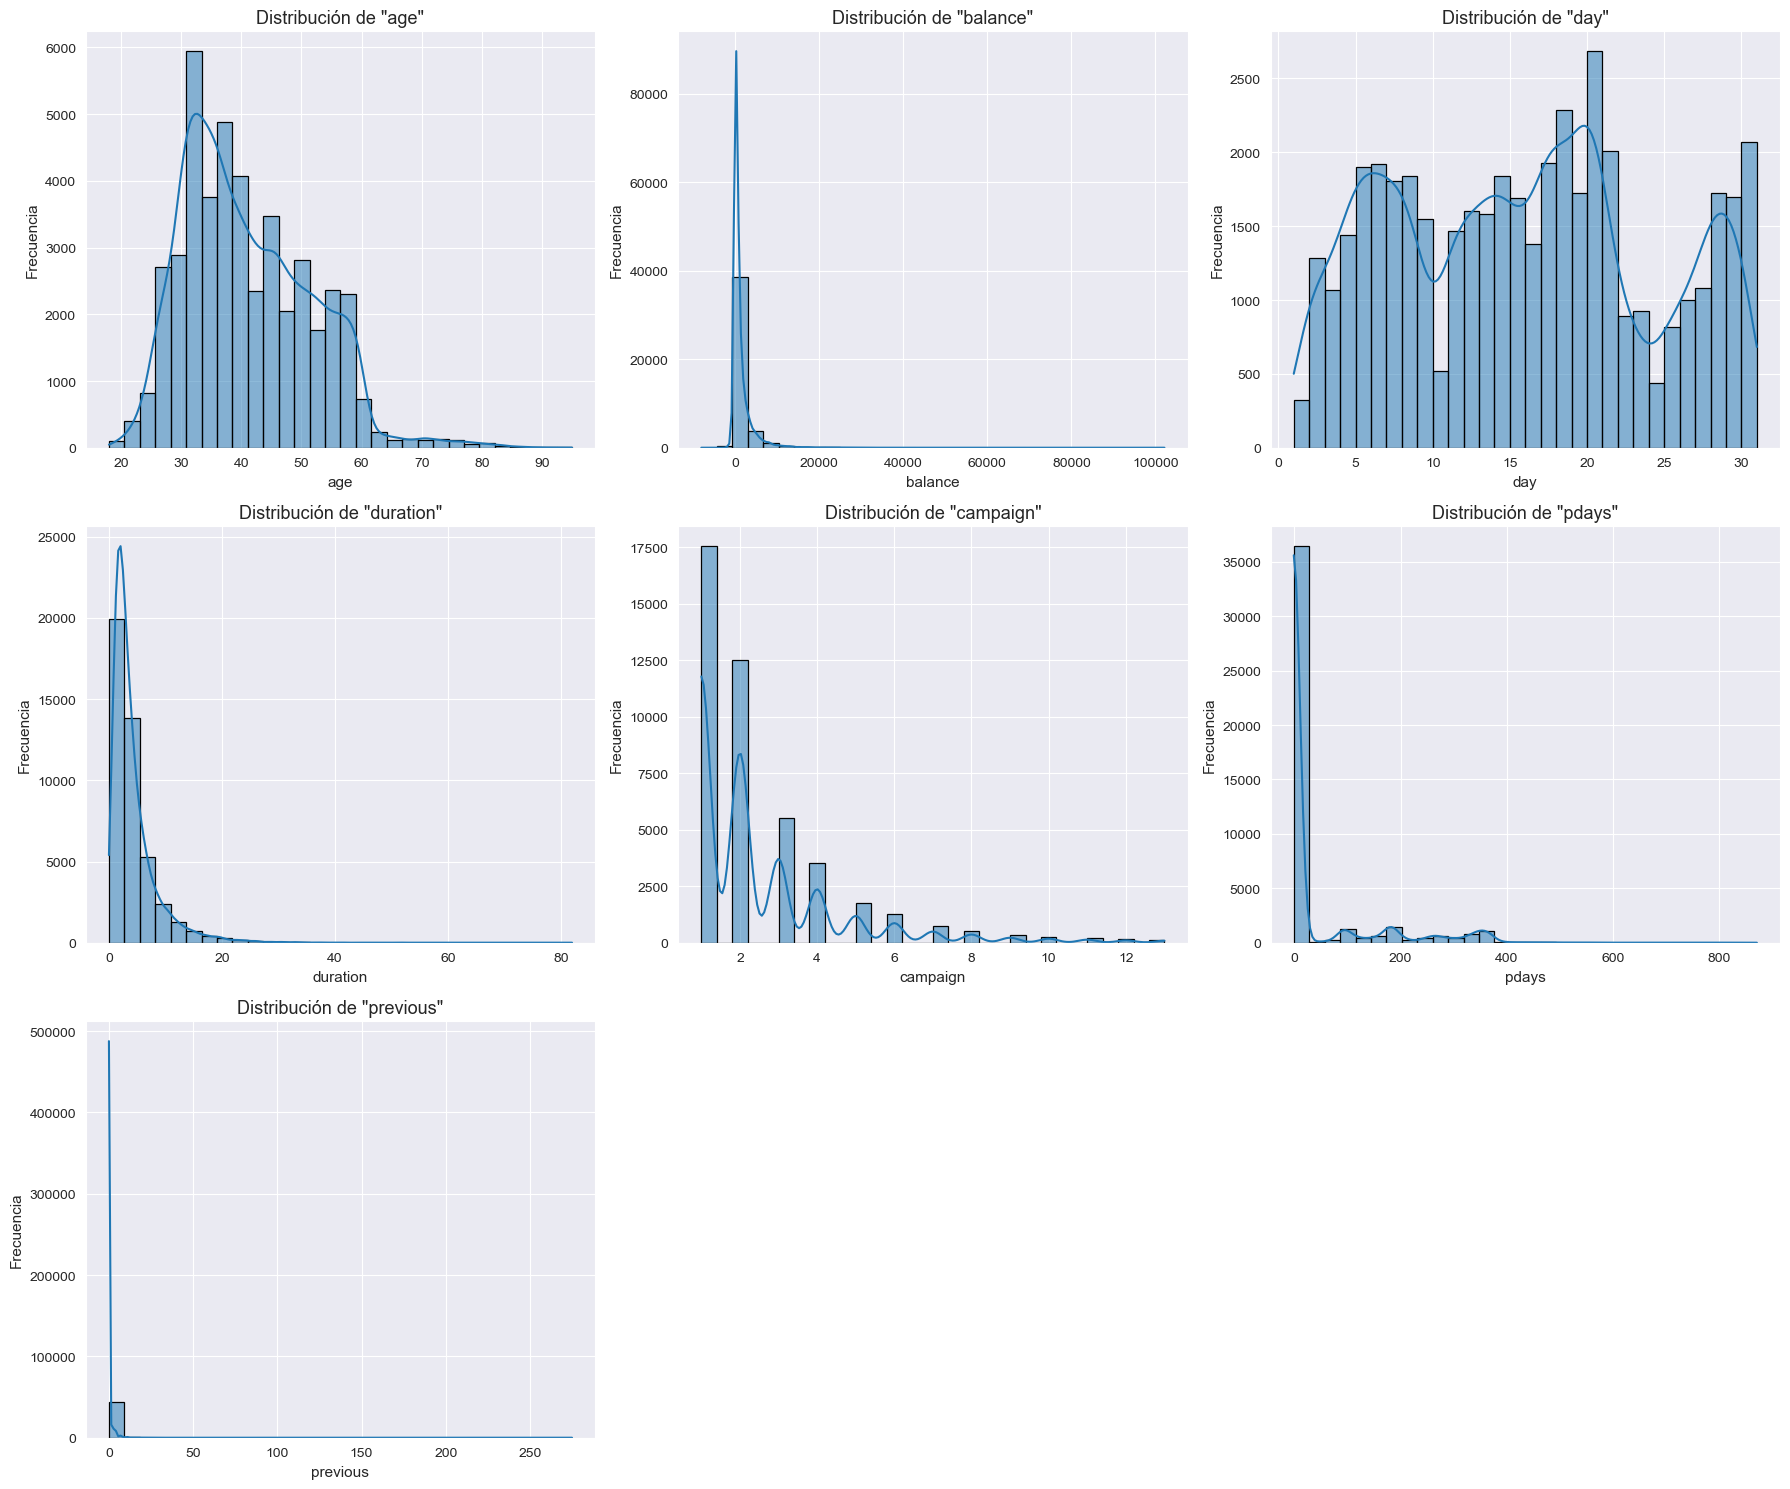

In [266]:
import math
numerical_vars = df_bank.select_dtypes(include=['int64', 'float64']).columns

# Cantidad de gr√°ficos y configuraci√≥n de grilla
num_vars = len(numerical_vars)
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Aplanar la grilla para recorrer f√°cilmente

# Generar cada histograma
for i, col in enumerate(numerical_vars):
    sns.histplot(df_bank[col], kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribuci√≥n de "{col}"', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)

# Eliminar ejes vac√≠os si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## üìä Conclusiones sobre la distribuci√≥n de variables num√©ricas

### üë§ `age` (Edad del cliente)
- Distribuci√≥n **asim√©trica negativa** (ligeramente sesgada a la izquierda).
- La mayor√≠a de los clientes tienen entre **30 y 40 a√±os**, con pocos valores por encima de los 70.
- No se observan outliers preocupantes.

### üí∂ `balance` (Saldo promedio anual)
- Distribuci√≥n **fuertemente sesgada a la derecha**, con varios valores extremos.
- La mayor√≠a de los saldos se concentran entre **0 y 5.000 euros**, aunque hay clientes con m√°s de **60.000 euros**.
- Existen outliers que podr√≠an ser considerados para transformaci√≥n o winsorizaci√≥n.

### üìÖ `day` (D√≠a del mes del √∫ltimo contacto)
- Distribuci√≥n **relativamente uniforme**, sin una tendencia clara.
- Puede estar m√°s relacionada a la operativa del banco que al comportamiento del cliente.

### ‚è±Ô∏è `duration` (Duraci√≥n del √∫ltimo contacto en minutos)
- Distribuci√≥n **altamente sesgada a la derecha**.
- La mayor√≠a de las llamadas duran menos de **10 minutos**, con algunos contactos muy extensos.
- Variable muy predictiva, pero debe usarse con cuidado para evitar **data leakage** (fuga de informaci√≥n).

### üìû `campaign` (Cantidad de contactos en la campa√±a actual)
- Distribuci√≥n **muy sesgada a la derecha**.
- La mayor√≠a de los clientes fueron contactados entre **1 y 3 veces**.
- Existen valores extremos superiores a 30 contactos, que pueden actuar como ruido.

### üìÜ `pdays` (D√≠as desde el √∫ltimo contacto en campa√±a anterior)
- Alta concentraci√≥n en el valor **-1** (no contactado antes).
- Entre los que s√≠ fueron contactados, la distribuci√≥n es nuevamente **sesgada a la derecha**, con pocos contactos recientes.

### üìû `previous` (N√∫mero de contactos previos antes de esta campa√±a)
- Distribuci√≥n **extremadamente sesgada**, con m√°s del 85% de los clientes con **0 contactos previos**.
- Algunos clientes fueron contactados muchas veces, lo cual puede ser indicio de intentos repetidos de conversi√≥n.


### ‚Üí An√°lisis de sesgos por edad.

In [267]:
edades = sorted(df_bank['age'].unique())
print(edades)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]


In [268]:
def grupo_etario(x):
    if x <= 30:
        return "joven"
    elif 31 <= x <= 45:
        return "adulto"
    else:
        return "mayor"

df_bank["grupo_etario"] = df_bank["age"].apply(grupo_etario)

In [269]:
suscripcion_por_edad = df_bank.groupby("grupo_etario").agg({"y" : "count"}).reset_index()
suscripcion_por_edad

grupo_etario      y
0       adulto  23324
1        joven   6926
2        mayor  14254

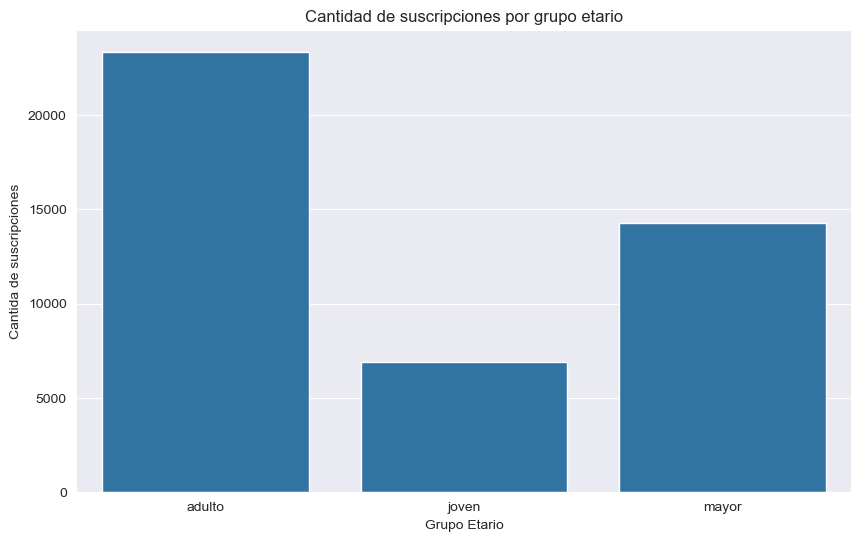

In [270]:
plt.figure(figsize=(10,6))
sns.barplot(data=suscripcion_por_edad, x="grupo_etario", y="y")
plt.title("Cantidad de suscripciones por grupo etario")
plt.xlabel("Grupo Etario")
plt.ylabel("Cantida de suscripciones")
plt.show()

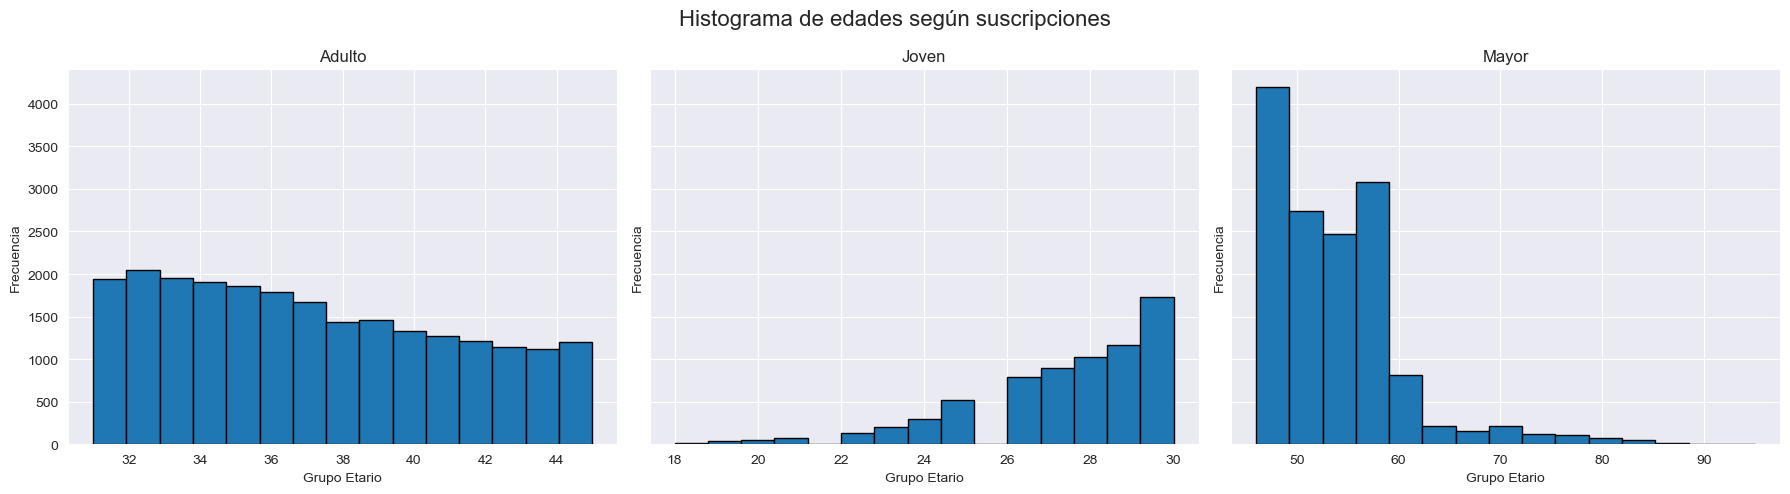

In [271]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
grupos = ["adulto", "joven", "mayor"]

for ax, grupo in zip(axes, grupos):
    subset = df_bank[df_bank["grupo_etario"] == grupo]
    ax.hist(subset["age"], bins=15, edgecolor='black')
    ax.set_title(f"{grupo.capitalize()}")
    ax.set_xlabel("Grupo Etario")
    ax.set_ylabel("Frecuencia")

fig.suptitle("Histograma de edades seg√∫n suscripciones", fontsize=16)
plt.tight_layout()
plt.show()


### ‚Üí Creo columna binaria seg√∫n percentil 75

In [272]:
df_bank['y'] = df_bank['y'].map({'yes': 1, 'no': 0})

In [273]:
df_bank["y"].value_counts()

y
0    39236
1     5268
Name: count, dtype: int64

In [274]:
si_suscrito = df_bank[df_bank['y'] == 1]
no_suscripto = df_bank[df_bank['y'] == 0]

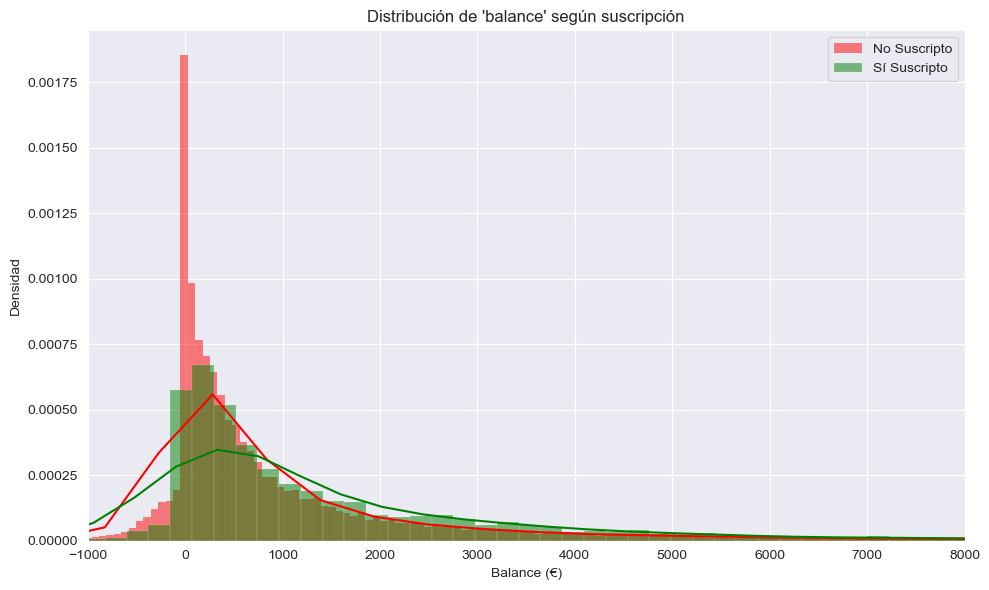

In [275]:
plt.figure(figsize=(10, 6))
sns.histplot(no_suscripto["balance"], label="No Suscripto", color="red", kde=True, stat="density")
sns.histplot(si_suscrito["balance"], label="S√≠ Suscripto", color="green", kde=True, stat="density")

plt.title("Distribuci√≥n de 'balance' seg√∫n suscripci√≥n")
plt.xlabel("Balance (‚Ç¨)")
plt.ylabel("Densidad")
plt.legend()
plt.xlim(-1000, 8000) 
plt.tight_layout()
plt.show()


## üí∂ Distribuci√≥n del Balance seg√∫n Suscripci√≥n

La gr√°fica muestra la distribuci√≥n del **balance promedio anual en euros**, diferenciando entre clientes que **no se suscribieron** (rojo) y aquellos que **s√≠ se suscribieron** (verde) a un dep√≥sito a plazo. A partir de la visualizaci√≥n, se pueden destacar las siguientes conclusiones:

### üîç Conclusiones:

- Los **clientes que se suscribieron** tienden a tener balances **ligeramente m√°s altos**, con una densidad m√°s pronunciada a partir de los **1.000‚Ç¨**, lo cual puede indicar una mayor capacidad econ√≥mica o mayor estabilidad financiera.

- Los **clientes no suscriptos** presentan un pico abrupto en torno a los **0‚Ç¨** o incluso valores negativos, lo que sugiere que muchos de ellos podr√≠an estar sobregirados o tener saldos muy bajos.

- A partir de los **2.000‚Ç¨**, la proporci√≥n de clientes suscriptos comienza a superar a la de los no suscriptos, manteni√©ndose constante a lo largo de la "cola larga" de la distribuci√≥n.

- La **asimetr√≠a positiva** es evidente en ambos grupos, con unos pocos clientes que presentan balances excepcionalmente altos (hasta m√°s de 70.000‚Ç¨), aunque estos son casos muy poco frecuentes.


### `Distribuci√≥n general de la variable target

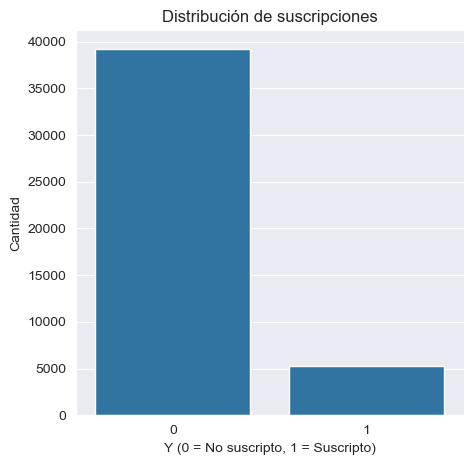

In [276]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_bank, x='y')
plt.title("Distribuci√≥n de suscripciones")
plt.xlabel("Y (0 = No suscripto, 1 = Suscripto)")
plt.ylabel("Cantidad")
plt.show()


### `An√°lisis por variables categ√≥ricas (satisfacci√≥n, desempe√±o, balance)`

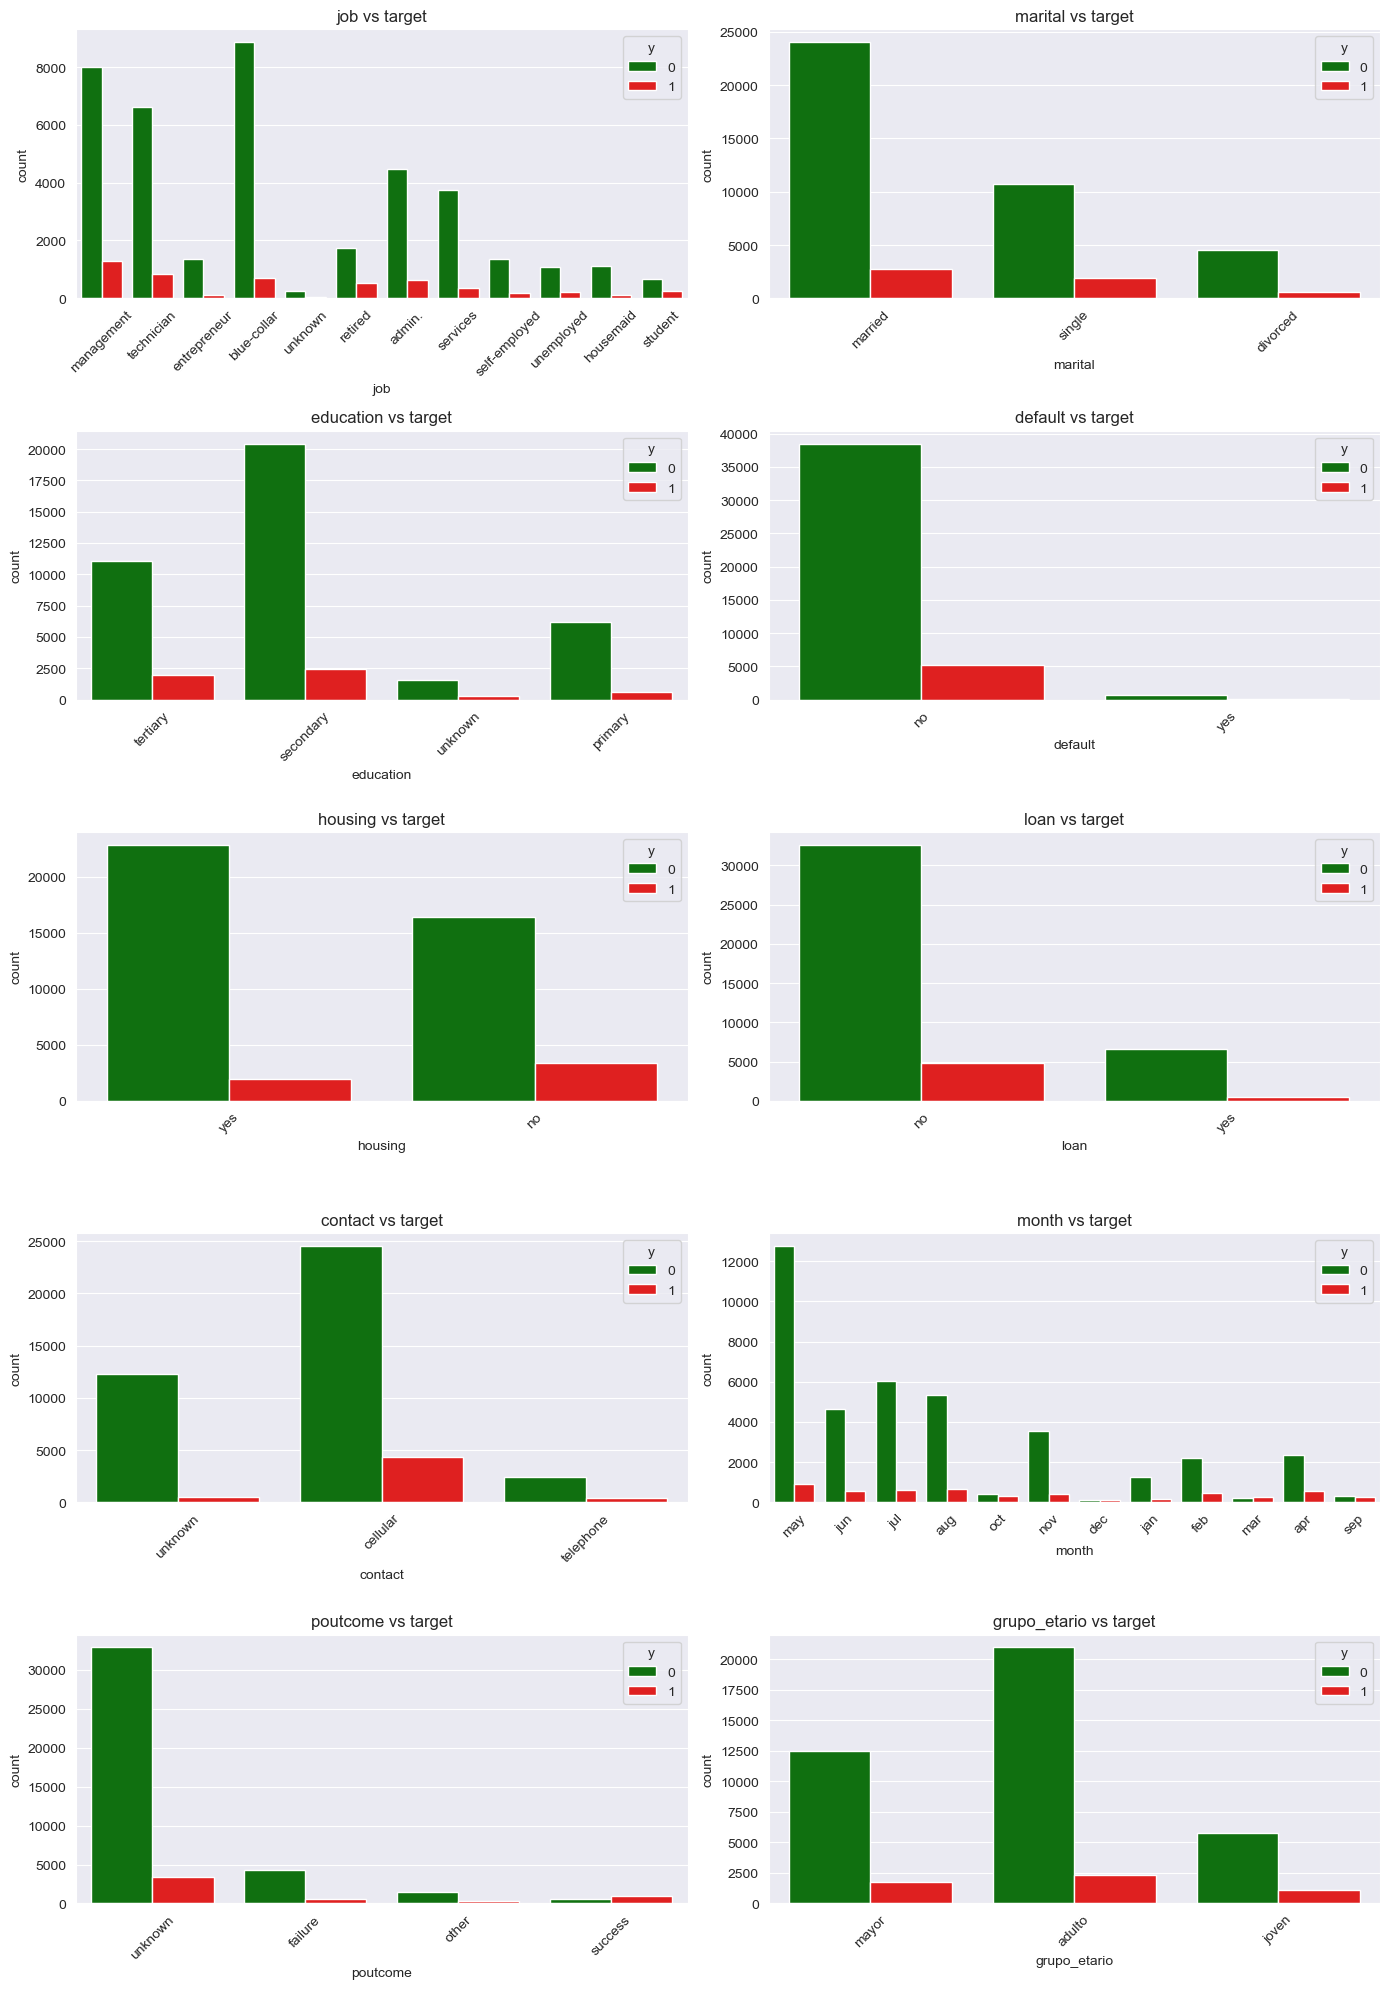

In [277]:
import math

categoricas = df_bank.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_bank, x=col, hue='y', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs target')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## üìå Conclusi√≥n

Con base en el an√°lisis realizado, los **clientes que s√≠ se suscribieron** tienden a compartir ciertas caracter√≠sticas que los distinguen de quienes **no lo hicieron**. A continuaci√≥n, se resumen las principales tendencias observadas:

| **Columna (Caracter√≠stica)** | **Tendencia en clientes suscriptos**                      |
|------------------------------|------------------------------------------------------------|
| üíº `job`                     | Mayor proporci√≥n en **estudiantes, jubilados y administrativos** |
| üíç `marital`                 | M√°s frecuente entre clientes **solteros**                  |
| üéì `education`              | Aumenta con nivel educativo: predominan **terciario y secundario** |
| ‚ùå `default`                | Muy pocos clientes con cr√©dito en **default**              |
| üè° `housing`                | M√°s frecuentes entre quienes **no tienen pr√©stamo hipotecario** |
| üí≥ `loan`                   | Rara vez tienen **pr√©stamos personales**                   |
| ‚òéÔ∏è `contact`                | Altamente asociados a contacto por **celular**             |
| üóìÔ∏è `month`                 | Mayor tasa de √©xito en los meses de **mayo, junio, julio y agosto** |
| üìä `poutcome`              | Aquellos con **√©xito en campa√±as anteriores** tienen mayor probabilidad |
| üë§ `grupo_etario`          | Predominan los clientes **adultos j√≥venes o solteros**     |

Estas observaciones sugieren que la probabilidad de contratar un dep√≥sito a plazo est√° fuertemente influenciada por factores demogr√°ficos (edad, estado civil), educativos, historial crediticio, y la forma y momento en que se realiza el contacto. Esta informaci√≥n es clave para **segmentar campa√±as futuras** y maximizar la tasa de conversi√≥n.


---

## **Parte 3: Preparaci√≥n de Datos para Modelado**


### ‚Üí Selecci√≥n de Caracter√≠sticas. Decido qu√© variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [278]:
df_bank.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'grupo_etario'],
      dtype='object')

In [279]:
binarias = ['default', 'housing', 'loan']
for col in binarias:
    df_bank[col] = df_bank[col].map({'yes': 1, 'no': 0})    

In [280]:
df_bank = df_bank.drop(['grupo_etario'], axis=1)

In [281]:
categoricas = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df_bank = pd.get_dummies(df_bank, columns=categoricas)

In [282]:
df_bank = df_bank.replace({True: 1, False: 0})

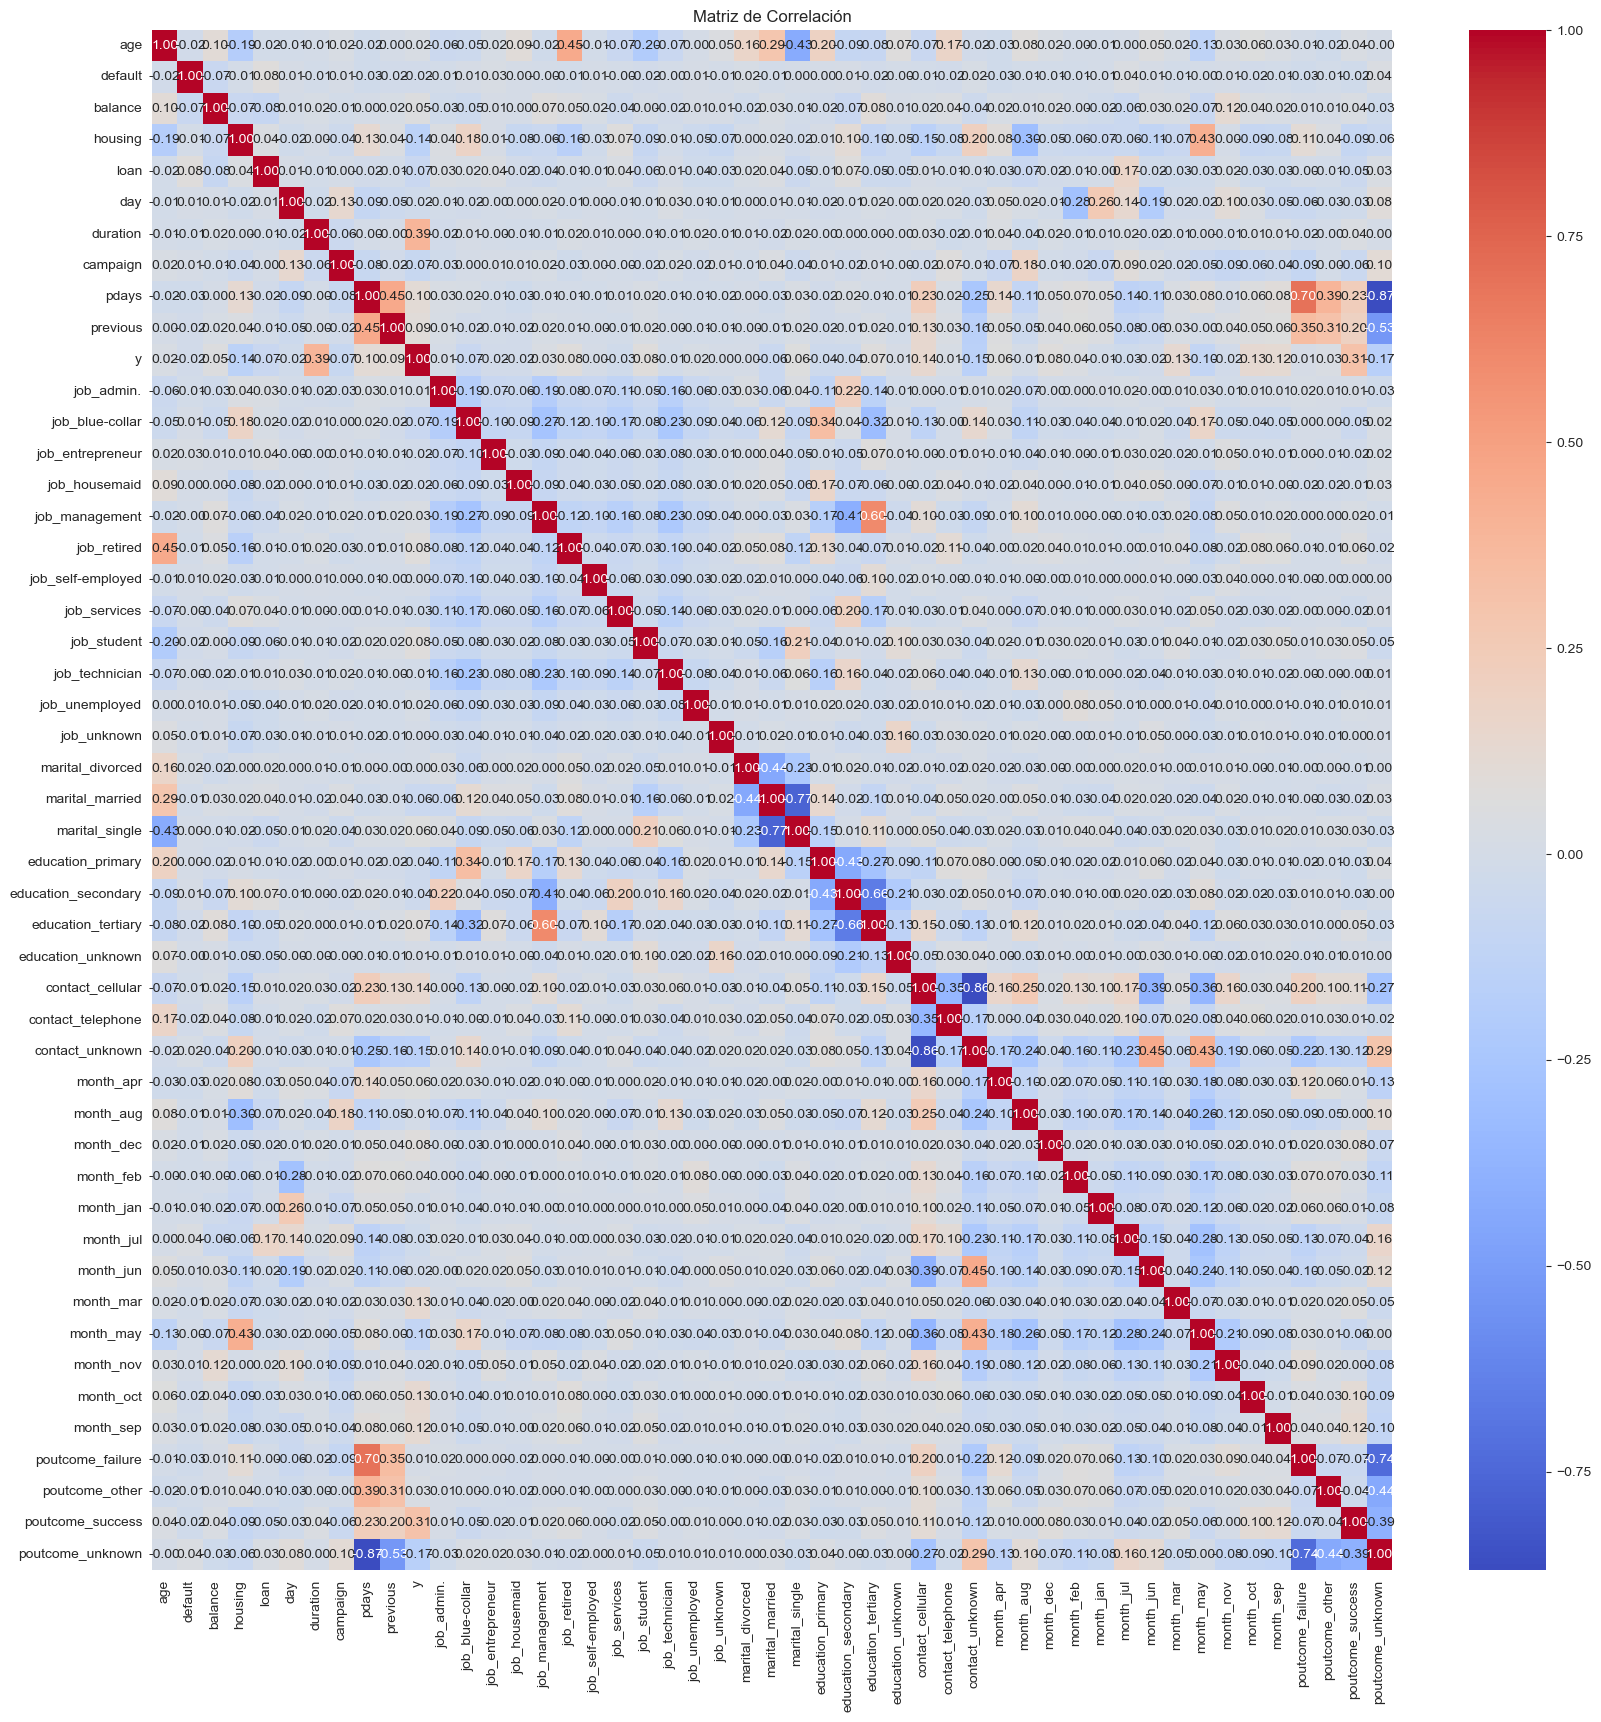

In [283]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_bank.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlaci√≥n")
plt.show()

In [284]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44504 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44504 non-null  int64  
 1   default              44504 non-null  int64  
 2   balance              44504 non-null  int64  
 3   housing              44504 non-null  int64  
 4   loan                 44504 non-null  int64  
 5   day                  44504 non-null  int64  
 6   duration             44504 non-null  float64
 7   campaign             44504 non-null  int64  
 8   pdays                44504 non-null  int64  
 9   previous             44504 non-null  int64  
 10  y                    44504 non-null  int64  
 11  job_admin.           44504 non-null  int64  
 12  job_blue-collar      44504 non-null  int64  
 13  job_entrepreneur     44504 non-null  int64  
 14  job_housemaid        44504 non-null  int64  
 15  job_management       44504 non-null  int6

In [285]:
##from scipy import stats
## df_casas = df_casas[(np.abs(stats.zscore(df_casas["price"])) < 3)]

### Hago Log Transform de la variable balance.

In [286]:
#df_bank["log_balace"] = np.log1p(df_bank["balance"])
#df_bank

---

## **Parte 4: Modelado**


In [287]:
# Separo mi df en X e Y
X = df_bank.drop(['y'], axis=1)
y = df_bank['y']

# Separo en train y test con 0.2 en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify = y
)

##### ¬øEst√° balanceado mi dataset?

In [288]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporci√≥n de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("N√∫mero de muestras por clase:\n", counts)
print("\nProporci√≥n de muestras por clase:\n", prop)


N√∫mero de muestras por clase:
 y
0    39236
1     5268
Name: count, dtype: int64

Proporci√≥n de muestras por clase:
 y
0    0.881629
1    0.118371
Name: count, dtype: float64


##### S√≠. Claramente este dataset esta desbalanceado, por lo tanto vamos a necesitar usar un metodo de balanceo de clases.

In [289]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [290]:
# Funciones que utilizar√© al trabajar con mi modelo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as st

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporci√≥n de clases
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('sampler', 'passthrough'),  # Balanceo de clases
        #('imputer', SimpleImputer(strategy='median')),  # Imputaci√≥n de valores faltantes
        ('scaler', StandardScaler()),  # Escalado de variables numericas
        ('selector', SelectKBest(f_classif)),  # Selecci√≥n de k caracter√≠sticas mejores
        ('classifier', model)  # Modelo
    ])


    # Hiperpar√°metros + opciones de balanceo
    full_param_grid = {
        'sampler': ['passthrough', SMOTE(), RandomOverSampler(), SMOTEENN(), SMOTETomek()], # estrategias de balanceo de clases
        'selector__k': [10, 15, 20, 25, 30, 35],
        **parameters # parametros propios de clasificador
    }

    # RandomizedSearchCV con scoring basado en recall (quiero optimizar esa m√©trica)
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='recall')
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_ # mejor combinaci√≥n de hiperpar√°metros encontrada
    best_model = grid.best_estimator_ # pipeline completo (incluyendo modelo y preprocesamiento) con mejor rendimiento
    best_score = grid.best_score_ # mejor valor de la m√©trica usada en CV (en este caso, recall)

    # M√©tricas de entrenamiento
    y_train_pred = best_model.predict(X_train)
    auc_roc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # M√©tricas de test
    y_pred = best_model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Prints
    print(f"Mejores par√°metros: {best_params}")
    print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
    print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
    print(f"Precision Train: {precision_train} and Precision Test: {precision}")
    print(f"Recall-Score Train: {recall_train} and Recall-Score Test: {recall}")
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    return recall, auc_roc, f1, precision, best_model, recall_train, auc_roc_train, f1_train, precision_train, best_params


---

## **Logistic Regresion**

Mejores par√°metros: {'selector__k': 20, 'sampler': RandomOverSampler(), 'classifier__class_weight': 'balanced', 'classifier__C': 0.01}
AUC-ROC Train: 0.8252571385448572 and AUC-ROC Test: 0.8246534347962661
F1-Score Train: 0.5462320477650476 and F1-Score Test: 0.5477582846003899
Precision Train: 0.41381418092909533 and Precision Test: 0.41650197628458496
Recall-Score Train: 0.8032747982914096 and Recall-Score Test: 0.7998102466793169


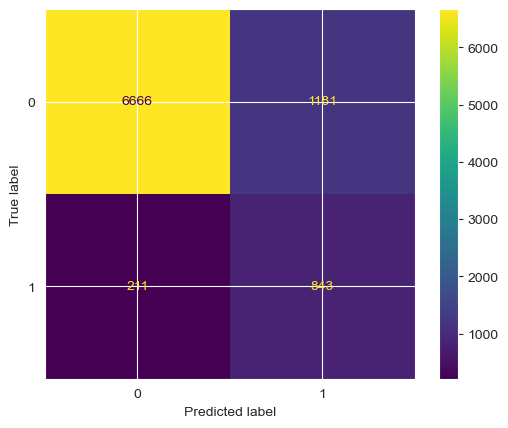

In [ ]:
model_lr = LogisticRegression(penalty='l2', random_state=99)

parameters_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1],  # inverso de la regularizaci√≥n L2 (menor C = m√°s regularizaci√≥n)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para tratar desbalance
}

lr = model_trial(model_lr, parameters_lr)


---

## **Random Forest**

Mejores par√°metros: {'selector__k': 25, 'sampler': RandomOverSampler(), 'classifier__n_estimators': 150, 'classifier__max_leaf_nodes': 16, 'classifier__max_depth': 8, 'classifier__class_weight': 'balanced'}
AUC-ROC Train: 0.8316760896606408 and AUC-ROC Test: 0.8292222532015885
F1-Score Train: 0.506906741804687 and F1-Score Test: 0.5082195597659516
Precision Train: 0.35677662764825385 and Precision Test: 0.35976331360946745
Recall-Score Train: 0.8751779781680114 and Recall-Score Test: 0.8652751423149905


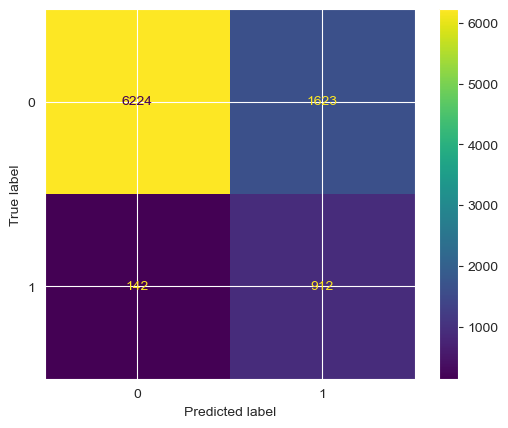

In [ ]:
model_rf = RandomForestClassifier(random_state=99)

parameters_rf = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # cantidad de √°rboles
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],  # profundidad m√°xima de cada √°rbol (m√°s profundo = m√°s complejo)
    'classifier__max_leaf_nodes': [4, 6, 8, 10, 12, 14, 16, 18, 20],  # m√°ximo n√∫mero de nodos internos (controla el tama√±o del √°rbol)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para manejar desbalance
}

rf = model_trial(model_rf, parameters_rf)


---

## **XGBoost**


Mejores par√°metros: {'selector__k': 30, 'sampler': RandomOverSampler(), 'classifier__subsample': 0.7, 'classifier__scale_pos_weight': 2, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 0.1, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 5, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.8}
AUC-ROC Train: 0.8006493127113551 and AUC-ROC Test: 0.7997872741223334
F1-Score Train: 0.4145529080194722 and F1-Score Test: 0.4165454167532737
Precision Train: 0.2643618064178812 and Precision Test: 0.2667021559755124
Recall-Score Train: 0.9598955861414333 and Recall-Score Test: 0.9506641366223909


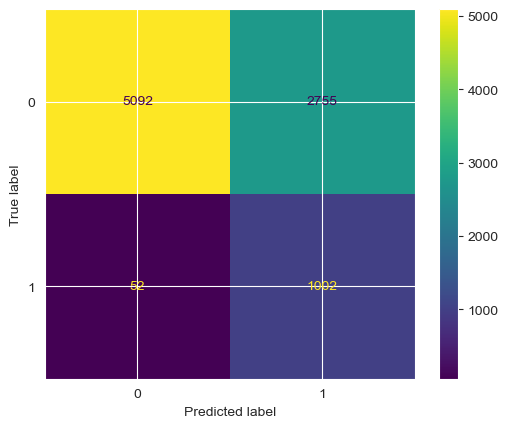

In [294]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

parameters_xgb = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # divisiones del modelo XGB
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # m√≠nimo information gain por divisi√≥n
    'classifier__max_depth': [3, 4, 5, 6, 7],  # reducir la profundidad
    'classifier__min_child_weight': [4, 5, 6, 7],  # mayor peso = menos divisi√≥n
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],  # tambi√©n baja un poco la complejidad
    'classifier__reg_alpha': [0.1, 0.5, 1],  # regularizaci√≥n L1
    'classifier__reg_lambda': [1, 2, 3],  # regularizaci√≥n L2
    'classifier__scale_pos_weight': [1, 1.5, 2]  # balanceo de clases para regresi√≥n log√≠stica
}

xgb = model_trial(model_xgb, parameters_xgb)

---

In [301]:
def crear_tabla_resultados(lr, rf, xgb, scoring='recall'):

    df_funciones = pd.DataFrame()
    df_funciones["metodo"] = ["Regresi√≥n Log√≠stica", "Random Forest", "XGB"]

    df_funciones["best_model"] = [lr[4], rf[4], xgb[4]]
    df_funciones["best_params"] = [lr[9], rf[9], xgb[9]]

    df_funciones["recall_train"] = [lr[5], rf[5], xgb[5]]
    df_funciones["recall"] = [lr[0], rf[0], xgb[0]]

    df_funciones["precision_train"] = [lr[8], rf[8], xgb[8]]
    df_funciones["precision"] = [lr[3], rf[3], xgb[3]]

    df_funciones["f1_train"] = [lr[7], rf[7], xgb[7]]
    df_funciones["f1"] = [lr[2], rf[2], xgb[2]]

    df_funciones["auc_roc_train"] = [lr[6], rf[6], xgb[6]]
    df_funciones["auc_roc"] = [lr[1], rf[1], xgb[1]]

    df_funciones = df_funciones.sort_values(by=scoring, ascending=False)

    return df_funciones

In [302]:
tabla = crear_tabla_resultados(lr, rf, xgb, scoring='recall')
display(tabla)

metodo                                         best_model  \
2                  XGB  (RandomOverSampler(), StandardScaler(), Select...   
1        Random Forest  (RandomOverSampler(), StandardScaler(), Select...   
0  Regresi√≥n Log√≠stica  (RandomOverSampler(), StandardScaler(), Select...   

                                         best_params  recall_train    recall  \
2  {'selector__k': 30, 'sampler': RandomOverSampl...      0.959896  0.950664   
1  {'selector__k': 25, 'sampler': RandomOverSampl...      0.875178  0.865275   
0  {'selector__k': 20, 'sampler': RandomOverSampl...      0.803275  0.799810   

   precision_train  precision  f1_train        f1  auc_roc_train   auc_roc  
2         0.264362   0.266702  0.414553  0.416545       0.800649  0.799787  
1         0.356777   0.359763  0.506907  0.508220       0.831676  0.829222  
0         0.413814   0.416502  0.546232  0.547758       0.825257  0.824653

In [305]:
def plot_roc_curves(lr, rf, xgb, X_test, y_test):

    modelos = {
        "Logistic Regression": lr[4],
        "Random Forest": rf[4],
        "XGBoost": xgb[4],
    }

    plt.figure(figsize=(9, 6))

    for nombre, modelo in modelos.items():
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

    # L√≠nea de referencia (modelo aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC comparativas')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

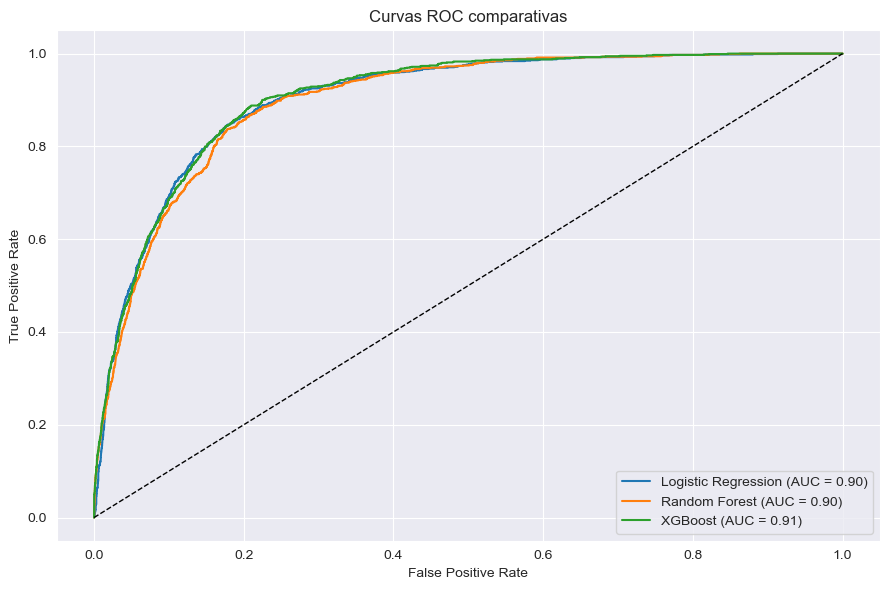

In [306]:
plot_roc_curves(lr, rf, xgb, X_test, y_test)

### üìä Conclusiones del Desempe√±o de Modelos de Clasificaci√≥n

Luego de entrenar y evaluar distintos modelos para predecir la suscripci√≥n a un dep√≥sito a plazo, se obtuvieron los siguientes resultados en el conjunto de test:

| Modelo                | Recall | Precision | F1-score | AUC-ROC |
|-----------------------|--------|-----------|----------|---------|
| **XGBoost**           | 0.9507 | 0.2667    | 0.4165   | 0.7998  |
| **Random Forest**     | 0.8653 | 0.3598    | 0.5082   | 0.8292  |
| **Regresi√≥n Log√≠stica** | 0.7998 | 0.4165    | 0.5478   | 0.8247  |

---

### ‚úÖ Observaciones clave

- **XGBoost** es el modelo con **mejor recall (0.95)**, lo que indica que identifica correctamente la mayor√≠a de los casos positivos (clientes que s√≠ se suscriben). Es ideal si se prioriza no perder oportunidades de conversi√≥n, aunque su precisi√≥n es baja.

- **Random Forest** logra el mejor **equilibrio entre recall y precision**, con un **F1-score superior a XGBoost**, lo que lo convierte en una opci√≥n s√≥lida cuando se busca balancear ambas m√©tricas.

- **Regresi√≥n Log√≠stica** tiene la **mejor precisi√≥n (0.4165)**, lo que significa que de los casos que predice como positivos, la proporci√≥n correcta es mayor. Sin embargo, su recall es m√°s bajo que los otros modelos.

- En t√©rminos de **AUC-ROC**, los tres modelos presentan valores altos (entre 0.80 y 0.83), indicando buena capacidad discriminativa general. **Random Forest y Log√≠stica** lideran este aspecto.

---

### üß† Conclusi√≥n final

- Si el objetivo es **no dejar pasar ning√∫n cliente potencial** que pueda contratar el servicio (minimizar falsos negativos), **XGBoost** es la mejor opci√≥n por su alt√≠simo **recall**.

- Si el foco est√° en **el balance entre efectividad y eficiencia** (minimizar tanto falsos positivos como falsos negativos), **Random Forest** es el modelo m√°s equilibrado.

- En escenarios donde los recursos son limitados y es m√°s importante **acertar a qui√©n se contacta**, la **regresi√≥n log√≠stica** puede ser √∫til por su **mayor precisi√≥n** y simplicidad interpretativa.

> La elecci√≥n final del modelo depende del **costo de los falsos negativos** vs. **falsos positivos** en el contexto de negocio.


---

# üìò Preguntas Te√≥ricas Relacionadas ‚Äì Inteligencia Artificial (2do Semestre 2023)

## a) ¬øPor qu√© es importante dividir el conjunto de datos en entrenamiento y prueba en este ejercicio?

Es importante dividir el conjunto de datos en Train (70% u 80%) y Test (30% o 20%) para:
- Saber si realmente mi modelo esta memorizando los datos o si esta aprendiendo de los patrones.
- Prevenir el overfitting, que es cuando hago un modelo tan espec√≠fico que despu√©s cuando cambio los datos comienzan a haber outsiders.

---

## b) Describe el concepto de "bagging" en Random Forest y c√≥mo contribuye a la mejora del rendimiento del modelo.

Bagging es una t√©cnica de ensamble, que significa combinar multiples modelos para mejorar el rendimiento. Nosotros podemos tener muchos modelos que tienen un bajo rendimiento, pero si los combinamos podemos tener un modelo mucho mas potente. 

Bagging se encarga de realizar un entrenamiento paralelo e independiente en donde la CPU y el uso de memoria son altos. Esta t√©cnica de ensable se encarga de reducir la varianza para poder hacer al modelo mas robusto y con menos sobreajuste.

---

## c) En el contexto de la regresi√≥n log√≠stica, explique el concepto de regularizaci√≥n. ¬øPor qu√© es importante aplicarla?

La regularizaci√≥n consiste en agregar un t√©rmino a la funci√≥n de coste para penalizar aquellos par√°metros que son altos.

Hay 3 tipos de regularizaci√≥n:

- Lasso (q=1) ‚Üí se utiliza cuando tengo muchas variables in√∫tiles y su objetivo es eliminar aquellas que tienen poca significancia poni√©ndoles un coeficiente de cero

- Ridge (q=2) ‚Üí se utiliza cuando tengo muchas variables que son √∫tiles y su objetivo es sacarle complejidad al modelo haciendo tender los coeficientes de las variables a cero.

- Elastic Net ‚Üí combina ambas t√©cnicas de regularizaci√≥n. Tiene como ventajas que elimina variables seg√∫n regularizaci√≥n de Lasso, permite el balanceo de clases (N y P), as√≠ como tambi√©n previene el overfitting. Tiene como desventajas que al reducir la varianza, aumenta el sesgo y que si o si se requiere de estandarizaci√≥n de datos num√©ricos.

Ambas ayudan a **mejorar la generalizaci√≥n** del modelo en datos no vistos.

---

## d) ¬øCu√°les son algunos de los hiperpar√°metros clave en un modelo de Random Forest y c√≥mo pueden afectar el rendimiento del modelo?

| Hiperpar√°metro            | Efecto principal                                                |
|---------------------------|------------------------------------------------------------------|
| `n_estimators`            | M√°s √°rboles ‚Üí mayor estabilidad pero mayor costo computacional. |
| `max_depth`               | Controla la profundidad de cada √°rbol ‚Üí afecta overfitting.      |
| `min_samples_split`       | M√≠nimo de muestras para dividir ‚Üí regula crecimiento del √°rbol.  |
| `max_features`            | Cu√°ntas features usar por √°rbol ‚Üí balancea diversidad y precisi√≥n. |

---

## e) ¬øPor qu√© podr√≠a ser beneficioso ajustar los hiperpar√°metros de un modelo de Random Forest, incluso en un conjunto de datos relativamente simple como este?

Ajustar hiperpar√°metros:
- Permite **mejorar la precisi√≥n** del modelo adapt√°ndolo a la estructura espec√≠fica del dataset.
- Evita **overfitting o underfitting** al encontrar la configuraci√≥n √≥ptima de profundidad, √°rboles y criterios de divisi√≥n.
- Incluso en datasets simples, puede **mejorar la eficiencia** computacional usando menos √°rboles o menor profundidad sin perder rendimiento.


---

# Resoluci√≥n de Problema con Algoritmos Gen√©ticos: Juegos Ol√≠mpicos

## a. Enunciado del problema

Se desea formar equipos de atletas para los Juegos Ol√≠mpicos, asignando a cada atleta a una disciplina deportiva en funci√≥n de sus habilidades f√≠sicas (como velocidad, fuerza, resistencia, precisi√≥n y flexibilidad) y sus preferencias personales.

Cada disciplina requiere cierto perfil f√≠sico, tiene un cupo limitado de participantes, y los atletas solo pueden participar en una √∫nica disciplina.

**Objetivo:** Asignar atletas a disciplinas de manera que se maximice el rendimiento global del equipo, considerando la afinidad entre habilidades del atleta y los requisitos del deporte, as√≠ como sus preferencias.

---

## b. ¬øPor qu√© resulta conveniente resolverlo con Algoritmos Gen√©ticos?

Los AG son una herramienta muy poderosa de la IA, basados en el principio de la selecci√≥n natural de Darwin. Los mismos permiten encontrar soluciones √≥ptimas a problemas muy dif√≠ciles que nosotros por fuerza bruta no podr√≠amos resolver.

Usar fuerza bruta implica encontrar soluciones:

- **Ineficientes en t√©rminos de tiempo y recursos**
- **Poco √≥ptimas, ya que la fuerza bruta siempre tiende a usar una soluci√≥n sub√≥ptima**
- **Con limitaciones de complejidad, debido a que la fuerza bruta es poco pr√°ctica y no se puede llevar a grandes escalas.**

``Dentro de las ventajas de los AG, tenemos las siguientes:``
	
- **Capacidad de optimizaci√≥n:** son capaces de encontrar soluciones √≥ptimas a problemas muy complejos con espacios de b√∫squeda muy grandes y dif√≠ciles de explorar.
- **Aplicabilidad y flexibilidad:** se pueden aplicar a un mont√≥n de ejemplos y casos haciendo que sean ampliamente vers√°tiles.
- **Paralelismo inherente:** gracias a la generaci√≥n de una poblaci√≥n, podemos llegar a un mismo objetivo por distintos caminos o soluciones.
- **Robustez y tolerancia a ruido:** soportan datos que son imprecisos e imperfectos.
- **Inexistencia de Restricciones:** como los problemas no tienen reglas, ni especificaciones, la aplicabilidad de los AG es muy extensa.

---

## c. Dos elementos a modificar para adaptar el algoritmo gen√©tico

### üîß 1. Representaci√≥n del individuo (genoma)

Cada individuo debe representar una asignaci√≥n de atleta ‚Üí disciplina.

**Programaci√≥n:**
Se crea una funci√≥n que genera un diccionario donde las claves son atletas y los valores son disciplinas asignadas.

```python
def create_individual(atletas, disciplinas):
    """
    Asigna a cada atleta una disciplina al azar, sin tener en cuenta todav√≠a restricciones ni habilidades.
    """
    individuo = {}
    for atleta in atletas:
        individuo[atleta] = random.choice(disciplinas)
    return individuo
```


### üîß 2. Funci√≥n de aptitud (fitness function)

Debe evaluar cu√°n buena es la asignaci√≥n:
- Bonus si el atleta est√° en su disciplina preferida.
- Bonus si sus habilidades se ajustan bien a lo requerido.
- Penalizaci√≥n si supera cupo o si el atleta es asignado a una disciplina inadecuada.

**Programaci√≥n:**
Se crea una funci√≥n que recorre el individuo y suma puntos por coincidencias y penaliza por incoherencias o incompatibilidades.

```python
def calcular_fitness(individuo, habilidades_atletas, requerimientos_disciplina, preferencias, cupos):
    """
    Calcula la utilidad de una asignaci√≥n atleta ‚Üí disciplina.
    Premia por coincidencias de habilidades y preferencias, penaliza por incompatibilidades y sobrecupo.
    """
    fitness = 0
    conteo_disciplina = {d: 0 for d in requerimientos_disciplina.keys()}

    for atleta, disciplina in individuo.items():
        conteo_disciplina[disciplina] += 1

        # Preferencia satisfecha
        if disciplina in preferencias[atleta]:
            fitness += 5

        # Coincidencias de habilidades
        habilidades = habilidades_atletas[atleta]
        requeridas = requerimientos_disciplina[disciplina]
        coincidencias = sum(
            1 for h in requeridas if habilidades[h] >= requeridas[h]
        )
        fitness += coincidencias  # bonus por match

    # Penalizaci√≥n por exceso de cupo
    for d, count in conteo_disciplina.items():
        if count > cupos[d]:
            fitness -= 10 * (count - cupos[d])  # penalizaci√≥n por sobrecupo

    return fitness
```


---

## d. Genotipo y Fenotipo

- **Genotipo:** Representaci√≥n interna del individuo. En este caso, un diccionario que indica qu√© atleta participa en qu√© disciplina.

- **Fenotipo:** Expresi√≥n externa y evaluable de esa soluci√≥n. Es decir, el rendimiento total del equipo ol√≠mpico basado en la asignaci√≥n propuesta.

---

## e. T√©cnica para seleccionar a los padres

**Selecci√≥n por torneo (Tournament Selection)**

Se eligen al azar `k` individuos y se selecciona el mejor de ellos como padre.

### Ventajas:
- R√°pido y simple.
- Control de presi√≥n selectiva ajustando el tama√±o del torneo.
- No requiere normalizar los valores de fitness.

### Desventajas:
- Si `k` es muy grande, puede reducir la diversidad y provocar convergencia prematura.
- Si `k` es muy peque√±o, puede introducir demasiado azar.

---

## f. ¬øSe puede utilizar evoluci√≥n continua?

**S√≠, podr√≠a utilizarse evoluci√≥n continua** si se espera que el problema cambie con el tiempo. Por ejemplo:

- Cambios en el estado f√≠sico de los atletas.
- Inclusi√≥n de nuevas disciplinas o eliminaci√≥n de otras.
- Variaci√≥n en las preferencias de los atletas.

La evoluci√≥n continua permite adaptar la poblaci√≥n de soluciones de forma din√°mica sin reiniciar el proceso desde cero, lo cual es √∫til en contextos cambiantes como entrenamientos prolongados o juegos clasificatorios.

**En un escenario est√°tico (una √∫nica competencia con datos fijos)**, no ser√≠a necesario implementar evoluci√≥n continua.
